In [10]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
CODE_DIR = "/home/cbarkhof/fall-2021"
CHECKPOINT_DIR = f"{CODE_DIR}/run_files/checkpoints"

import os
import torch
import pickle

%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text
import seaborn as sns; sns.set()

import sys
sys.path.append(CODE_DIR)

In [12]:
from analysis.analysis_steps import make_run_overview_df

prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) "]
run_df = make_run_overview_df(prefixes=prefixes)
# run_df.drop("run_name", axis=1)
run_df["checkpoint_path"] = CHECKPOINT_DIR + "/" + run_df["run_name"] + ".pt"
run_df

,objective,l_rate,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,checkpoint_path
MDR-VAE 40 dec: CNN.T,MDR-VAE,0,0,0,40,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) ...,/home/cbarkhof/fall-2021/run_files/checkpoints...
MDR-VAE 32 dec: CNN.T,MDR-VAE,0,0,0,32,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=32.0] | q(z|x) ...,/home/cbarkhof/fall-2021/run_files/checkpoints...
MDR-VAE 24 dec: CNN.T,MDR-VAE,0,0,0,24,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=24.0] | q(z|x) ...,/home/cbarkhof/fall-2021/run_files/checkpoints...
MDR-VAE 16 dec: CNN.T,MDR-VAE,0,0,0,16,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=16.0] | q(z|x) ...,/home/cbarkhof/fall-2021/run_files/checkpoints...
MDR-VAE 8 dec: CNN.T,MDR-VAE,0,0,0,8,0,basic_deconv_decoder,(mdr-vae-exp 8 oct) MDR-VAE[R>=8.0] | q(z|x) i...,/home/cbarkhof/fall-2021/run_files/checkpoints...
...,...,...,...,...,...,...,...,...,...
INFO-VAE l_Rate 100 l_MMD 100 dec: CNN.T,INFO-VAE,100,0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",/home/cbarkhof/fall-2021/run_files/checkpoints...
INFO-VAE l_Rate 1000 l_MMD 1 dec: CNN.T,INFO-VAE,1000,0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1000.0, ...",/home/cbarkhof/fall-2021/run_files/checkpoints...
INFO-VAE l_Rate 100 l_MMD 1000 dec: PixelCNN++,INFO-VAE,100,0,0,0,1000,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=100.0, l...",/home/cbarkhof/fall-2021/run_files/checkpoints...
INFO-VAE l_Rate 1 l_MMD 1000 dec: CNN.T,INFO-VAE,1,0,0,0,1000,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=1.0, l_2...",/home/cbarkhof/fall-2021/run_files/checkpoints...


In [8]:
from analysis.analysis_utils import get_n_data_samples_x_y

# DATA
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=1000)

objective                                                    MDR-VAE
l_rate                                                             0
beta_beta                                                          0
free_bits                                                          0
mdr_value                                                         40
l_mmd                                                              0
decoder                                         basic_deconv_decoder
run_name           (mdr-vae-exp 8 oct) MDR-VAE[R>=40.0] | q(z|x) ...
checkpoint_path    /home/cbarkhof/fall-2021/run_files/checkpoints...
Name: MDR-VAE 40 dec: CNN.T, dtype: object

mdr_loss: 0.46 | mdr_multiplier: 0.92 | total_loss: 107.70 | mmd: 0.15 | elbo: -107.24 | distortion: 67.73 | kl_prior_post: 39.51 | mean_mean: 0.10 | std_across_x_mean: 1.41 | std_across_z_mean: 1.47 | mean_scale: 0.04 | std_across_x_scale: 0.01 | std_across_z_scale: 0.01 | log_det_cov_q_z: 4.97 | iw_ll: -105.03 | 


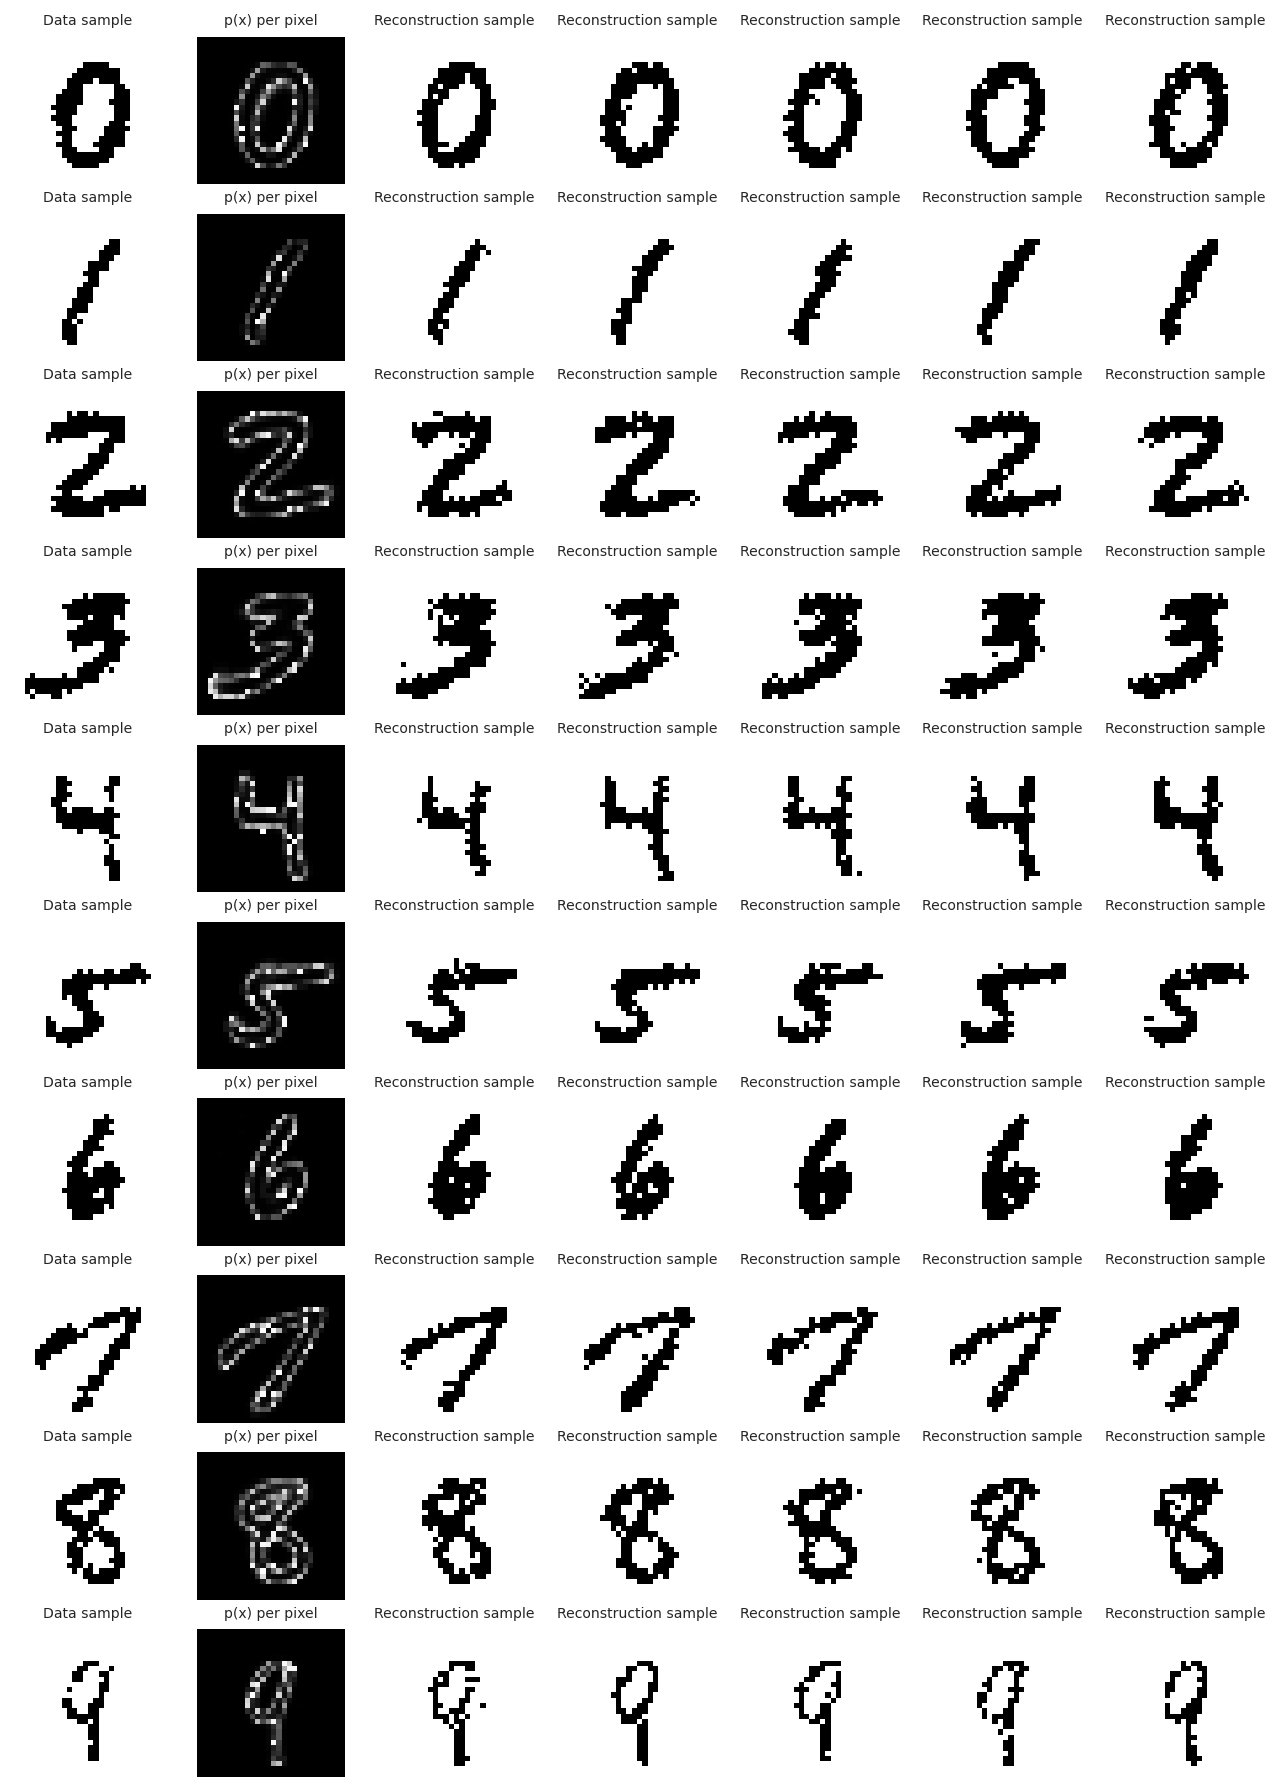

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


AttributeError: 'KNeighborsClassifier' object has no attribute 'dim'

In [13]:
from analysis.analysis_plots import plot_posterior_analysis_grid, plot_prior_analysis_grid
from utils import load_checkpoint_model_for_eval

for cn, row in run_df.iterrows():
    
    # display(row)
    
    vae_model = load_checkpoint_model_for_eval(row["checkpoint_path"], map_location="cuda:0", return_args=False)
    
    plot_posterior_analysis_grid(vae_model, data_X, data_y, n_sampled_reconstructions=5, 
                                 plot_name=None, plot_dir=None)
    
    prior_analysis = plot_prior_analysis_grid(vae_model, data_X, data_y, n_recon_samples=5, 
                                              gen_batch_size=100, gen_n_batches=5, plot_name=None, plot_dir=None)
    
    break